In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
import chardet

def find_encoding(fname):
    r_file = open(fname, 'rb').read()
    result = chardet.detect(r_file)
    return result['encoding']

file_encoding = find_encoding('/content/spam.csv')
print(file_encoding)

Windows-1252


In [5]:
df = pd.read_csv('/content/spam.csv',encoding=file_encoding)

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
552,ham,"Sure, if I get an acknowledgement from you tha...",NaN,NaN,NaN
1260,ham,"Yo, I'm at my parents' gettin cash. Good news:...",NaN,NaN,NaN
3198,ham,No de.am seeing in online shop so that i asked.,NaN,NaN,NaN
4750,spam,Your weekly Cool-Mob tones are ready to downlo...,NaN,NaN,NaN
4414,ham,"Yeah I should be able to, I'll text you when I...",NaN,NaN,NaN


In [7]:
df.shape


(5572, 5)

In [ ]:
#  PLAN OF ACTION :
# S1. Data Cleaning
# S2. Exploratory Data Analysis
# S3. Text Preprocessing
# S4. Model building
# S5. Evaluation
# S6 Improvement
# S7. Website
# S8. Deploy

# Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop last three columns
df.drop(columns  = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#renaming the columns
df.rename(columns = {'v1' : 'target' , 'v2' : 'text'}, inplace = True)

In [14]:
df.sample()

,target,text
3961,spam,You have been specially selected to receive a ...


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [55]:
df['target']=encoder.fit_transform(df['target'])

<ipython-input-55-d2f9eb7c9a0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target']=encoder.fit_transform(df['target'])


In [56]:
df[df['target'] == 'spam']


,target,text,num_characters,num_words,num_sentences


In [19]:
#spam --> 1 and ham-->0

#check missing values
df.isnull().sum()

,0
target,0
text,0


In [21]:
#check duplicates
df = df.drop_duplicates(keep = 'first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5169, 2)

# EDA (Exploratory Data Analysis)

In [25]:
df['target'].value_counts()

,count
target,
ham,4516
spam,653


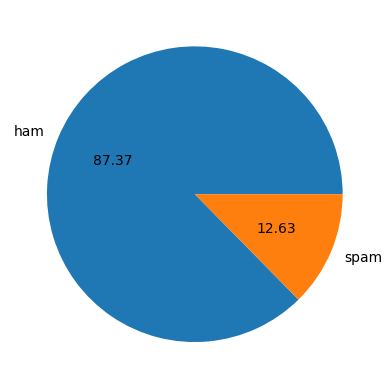

In [28]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [29]:
# Data is not balanced


In [30]:
import nltk

In [31]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
df['num_characters'] = df['text'].apply(len)

<ipython-input-34-f0cf0a313c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [35]:
df.head()

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [37]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-37-5fdd8176cbb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [38]:
df.head()

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-39-756a7156c0d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [57]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [60]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

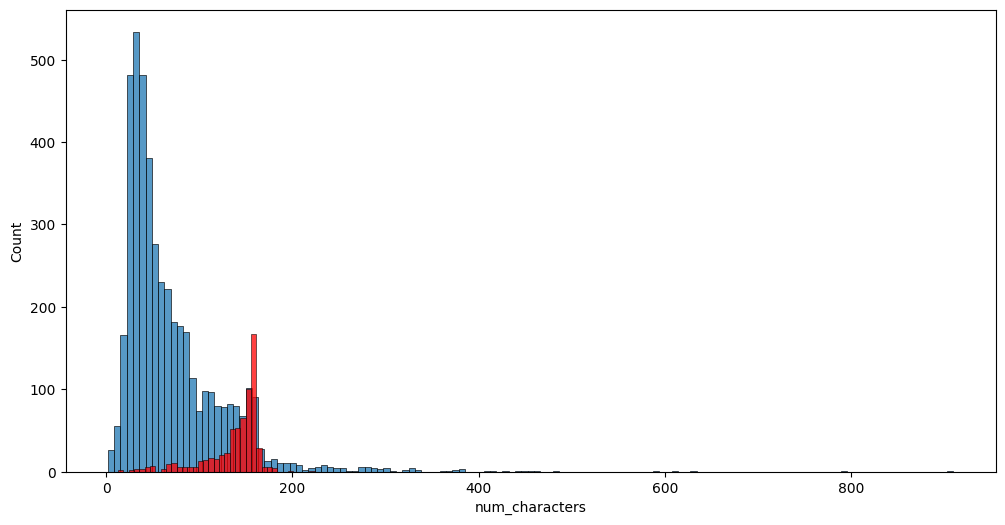

In [64]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

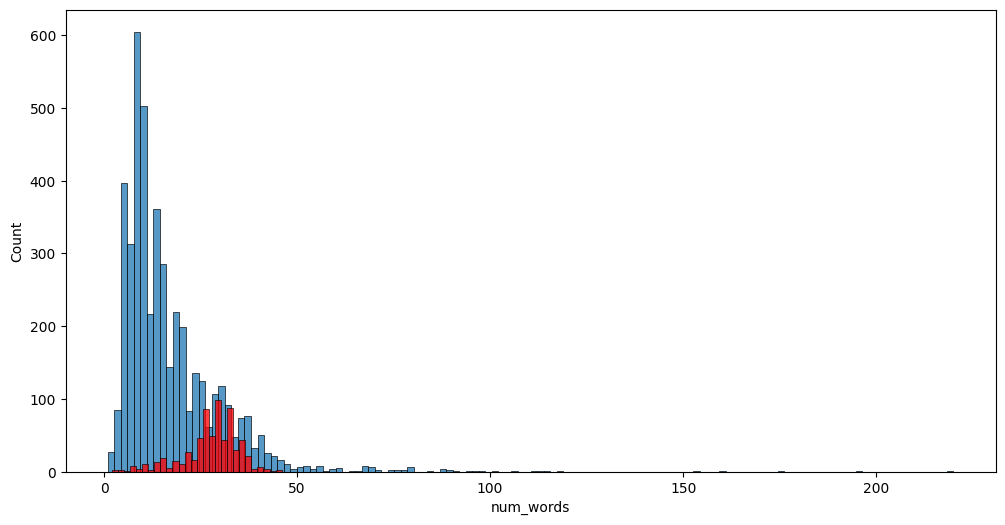

In [65]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

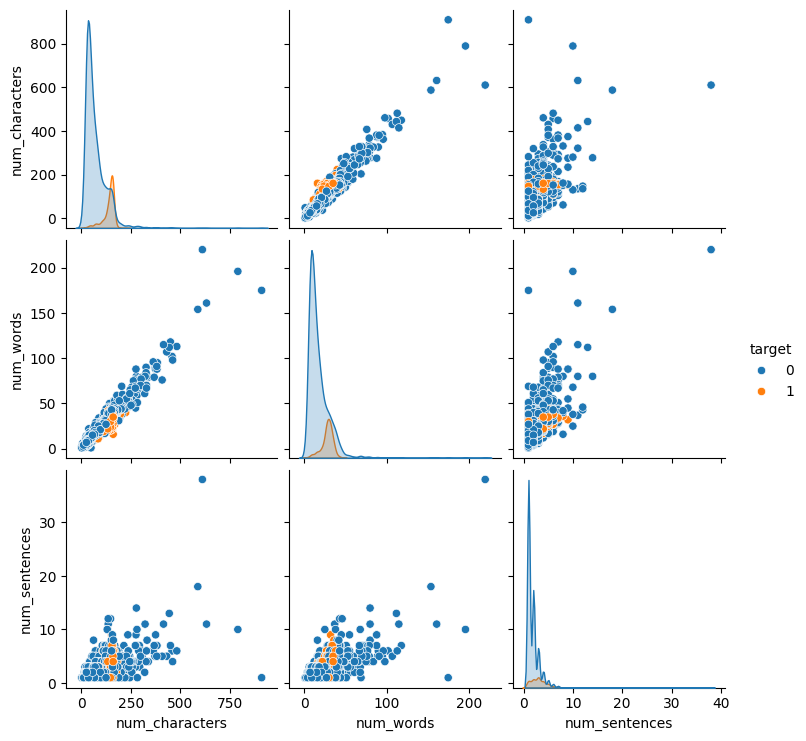

In [66]:
sns.pairplot(df,hue='target')

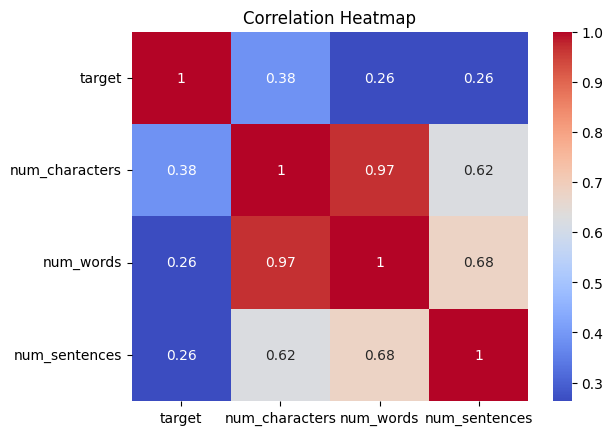

In [69]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming








In [81]:
import nltk
nltk.download('stopwords')

import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [88]:
def  transform_txt(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:

    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [90]:
transform_txt('i loved the latest episode of Naruto, how about you?')

'love latest episod naruto'

In [85]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [92]:
 df['transformed_txt'] = df['text'].apply(transform_txt)

In [93]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [99]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [100]:
spam_wc = wc.generate(df[df['target']==1]['transformed_txt'].str.cat(sep=" "))#only those which are spam

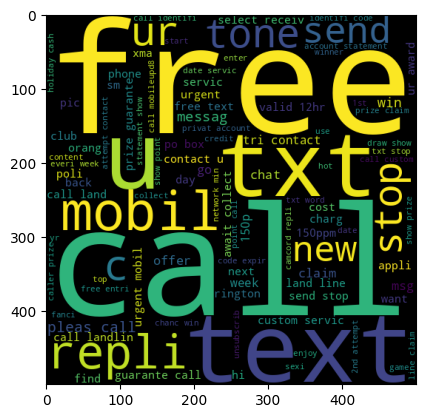

In [101]:
plt.imshow(spam_wc)

In [102]:
ham_wc = wc.generate(df[df['target']==0]['transformed_txt'].str.cat(sep=" "))#only those which are ham

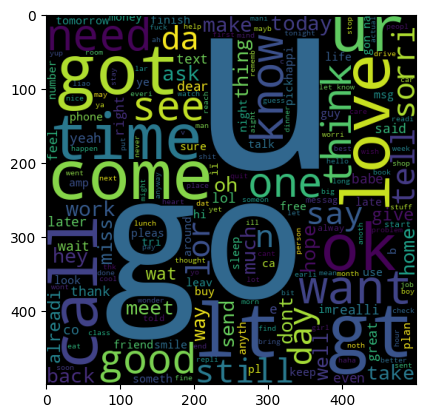

In [104]:
plt.imshow(ham_wc)

In [107]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_txt'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [108]:
len(spam_corpus)

9939

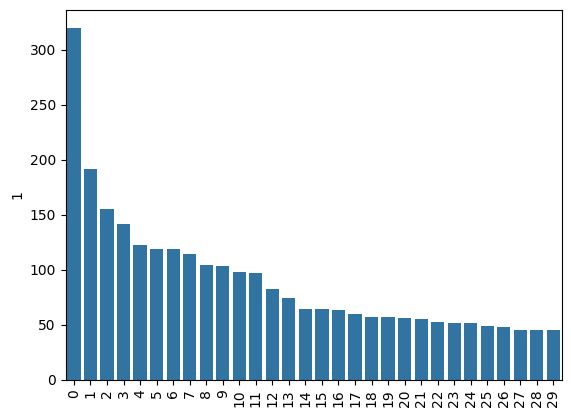

In [114]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [115]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_txt'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


In [116]:
len(ham_corpus)

35404

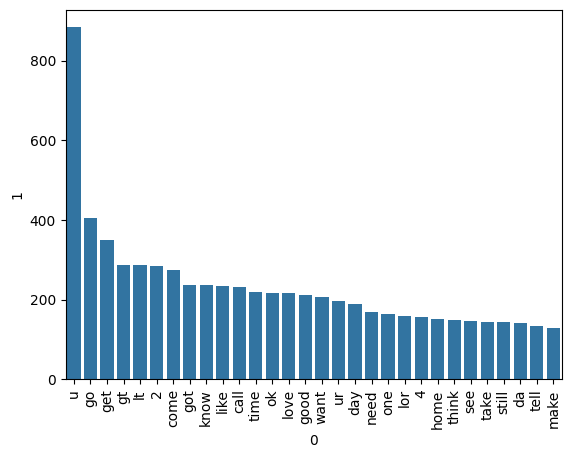

In [120]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [145]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [146]:
X = tfidf.fit_transform(df['transformed_txt']).toarray()

In [147]:
X.shape


(5169, 3000)

In [148]:
y = df['target'].values

In [149]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [150]:
from sklearn.model_selection import train_test_split


In [151]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [152]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [153]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [154]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [155]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [144]:
# tfidf --> mnb

In [ ]:
# Therefore our desired model will be Multinomial Naive Bayes model with a precision of 1 and accuracy of 97 percent.